[1] 2 5 4 2 7 1 4 3 4 1 5 7

[1] 5 7 4 1 3 2 4 5 4 1 9 6

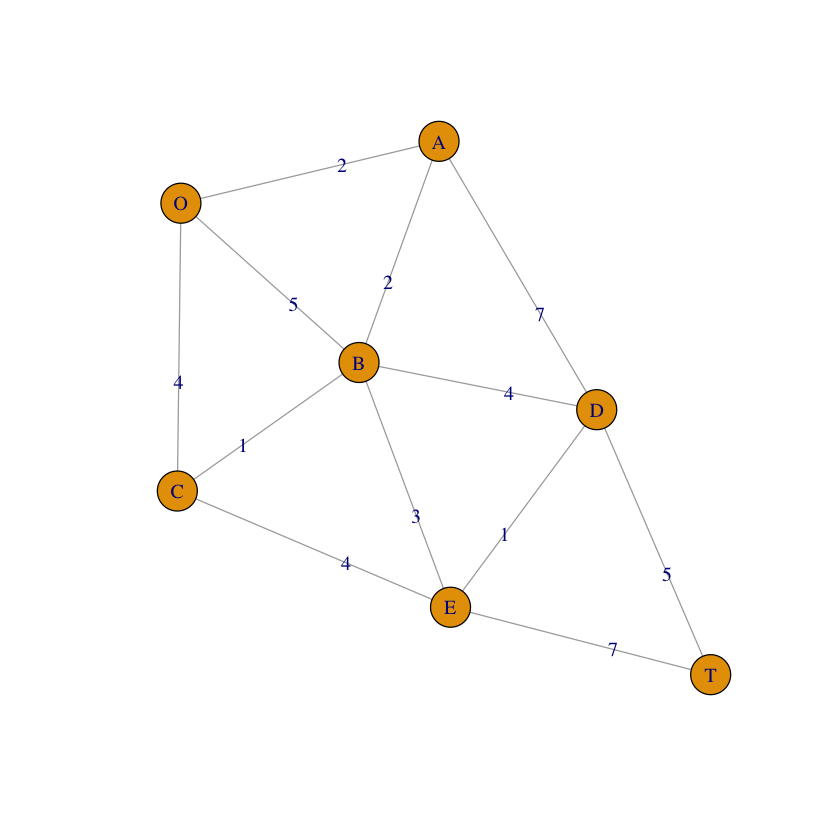

In [41]:
# Import library
library(igraph)
# Read the file and build a graph from a dataframe
# https://drive.google.com/open?id=0B-dmEvN59Z2Zdlg4UVY1cENVbzg
dat<-read.csv("seervadaPark.csv")
g <- graph_from_data_frame(dat, directed=FALSE)
# We have information about the edges weight and capacity
E(g)$weight
E(g)$capacity
plot(g, edge.label=E(g)$weight, layout=layout_nicely)

In [20]:
# Shortest path problem
# Find all shortest path from O to T
asp<-all_shortest_paths(g, from="O", to="T")
# See what's in asp
asp
# This are the paths:
asp$res[[1]]
asp$res[[2]]

$res
$res[[1]]
+ 5/7 vertices, named:
[1] O A B D T

$res[[2]]
+ 6/7 vertices, named:
[1] O A B E D T


$nrgeo
[1] 1 1 1 1 2 1 2


+ 5/7 vertices, named:
[1] O A B D T

+ 6/7 vertices, named:
[1] O A B E D T

In [21]:
# Get the weights (cost) of the paths
sum(E(g, path=V(g)[asp$res[[1]]]$name)$weight)
sum(E(g, path=V(g)[asp$res[[2]]]$name)$weight)

[1] 13

[1] 13

In [22]:
# get the cost/distance of the path from the 
# distances matrix
# This is easier
distances(g)["O", "T"]

[1] 13

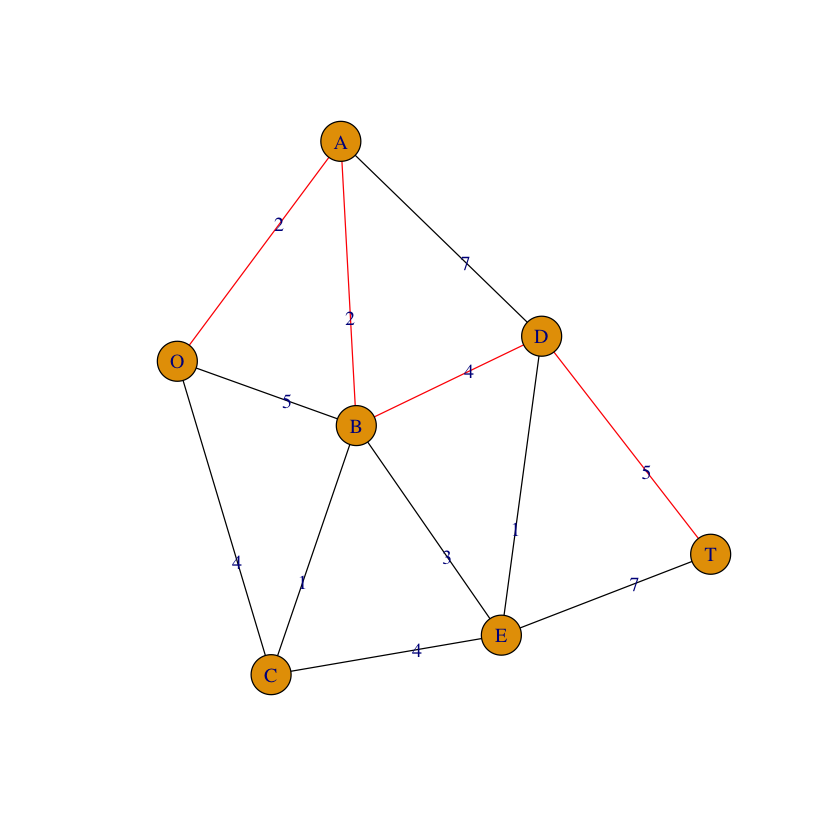

In [35]:
# Lets color the shortest path in red
E(g)$color <- "black"
E(g, path=V(g)[asp$res[[1]]]$name)$color <- "red"
plot(g, edge.label=E(g)$weight, layout=layout_nicely)

[1] 14

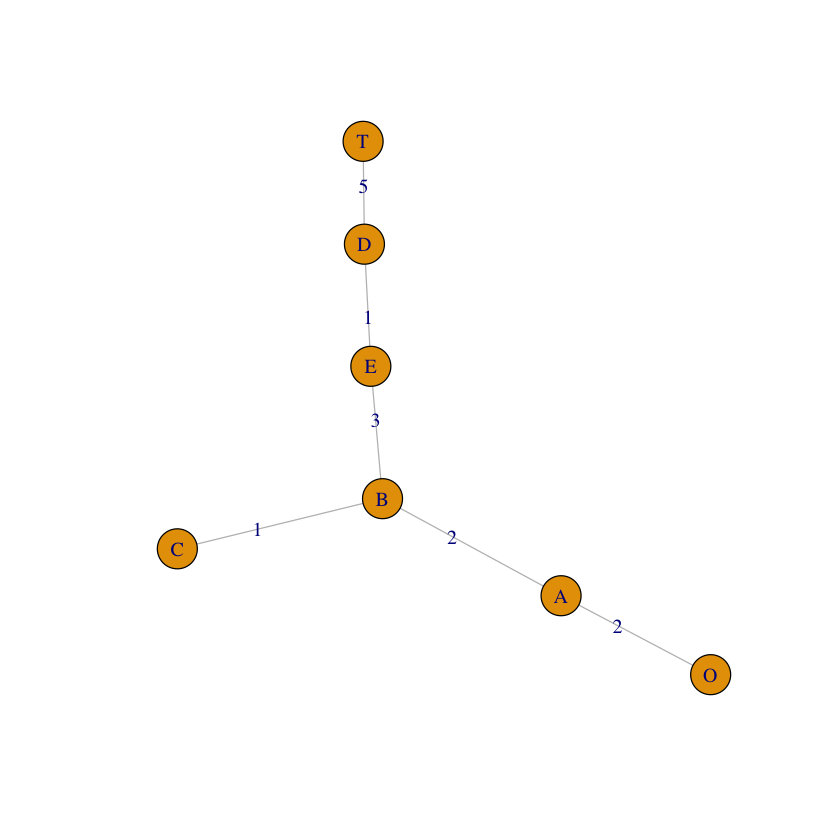

In [44]:
# Assign same color to all edges to continue
# with the MST problems
# Or use different windows for each problem
# windows()
E(g)$color<-"gray"

# Minimum spanning tree
t<-mst(g)
plot(t, edge.label=E(t)$weight)
# You can use a tree layout
# plot(t, edge.label=E(t)$weight, layout=layout_as_tree)
sum(E(t)$weight)